# Datahenting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For å hente ut dataen, må den pakkes ut. Vi trener py7zr for dette

In [ ]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.0/384.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 24.4 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
import py7zr
import shutil
import pandas as pd
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Iceberg challenge/"

Dataen kommer som en zip-fil som må pakkes ut

In [ ]:
with zipfile.ZipFile(path + "data/statoil-iceberg-classifier-challenge.zip", 'r') as zip_ref:
    zip_ref.extractall(path + "unziped/")

Dataen er deretter komprimert. Vi bruker py7zr for å hente ut daten fra filene

In [ ]:
for filename in os.listdir(path + "unziped/"):
    with py7zr.SevenZipFile(os.path.join(path + "unziped/", filename), mode='r') as archive:
        archive.extractall(path=path)

Dataen flyttes

In [ ]:
for filename in os.listdir(path + "data/processed/"):

    src_file = os.path.join(path + "data/processed/", filename)
    dst_file = os.path.join(path, filename)

    shutil.move(src_file, dst_file)

Sjekker dataen train.json for å se hva lags type data det er.

In [ ]:
train = pd.read_json(r"/content/drive/MyDrive/Iceberg challenge/train.json")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB


Vi endrer vinkelen til en float. Dette er relevant senere.

In [ ]:
train["inc_angle_float"] = train["inc_angle"].replace("na", np.nan).astype(float)

Ser vi på dataen ser vi at vi har to lister som blir bildene og en angle.

In [ ]:
train.head()

,id,band_1,band_2,inc_angle,is_iceberg,inc_angle_float
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0,43.9239
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0,38.1562
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1,45.2859
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0,43.8306
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0,35.6256


Vi ser på maks og min av angel og bruker dette videre når vi skal gjøre dataen klar for modellen. Vi ser også på medianen.

In [ ]:
train.describe()

,is_iceberg,inc_angle_float
count,1604.000000,1471.000000
mean,0.469451,39.268707
std,0.499222,3.839744
min,0.000000,24.754600
25%,0.000000,36.106100
50%,0.000000,39.501500
75%,1.000000,42.559100
max,1.000000,45.937500


Etter det utforsker vi dataen til bildene for å kunne gjøre det om til skikkelige bilder

In [ ]:
images = train['band_1'].apply(pd.Series)

In [ ]:
images.describe()

,0,1,2,3,4,5,6,7,8,9,...,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,...,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,-21.302326,-21.288866,-21.295688,-21.189692,-21.222296,-21.282704,-21.208693,-21.208613,-21.221149,-21.165331,...,-21.099285,-21.187623,-21.114997,-21.099205,-21.175288,-21.198813,-21.129364,-21.120029,-21.141225,-21.232032
std,4.661642,4.585940,4.620560,4.637229,4.665151,4.598152,4.602969,4.701104,4.719870,4.608224,...,4.795787,4.844566,4.755315,4.682830,4.654673,4.680857,4.727302,4.679988,4.690738,4.711066
min,-34.342476,-35.199150,-34.483612,-36.112686,-34.236160,-35.130840,-35.138069,-36.398098,-36.078415,-37.120934,...,-33.610283,-34.794334,-33.822159,-34.310867,-34.577980,-34.374985,-34.348328,-38.296291,-34.411652,-35.915554
25%,-24.589828,-24.375652,-24.465958,-24.412218,-24.445268,-24.525135,-24.222940,-24.360941,-24.480304,-24.391779,...,-24.293627,-24.451814,-24.452619,-24.345105,-24.387427,-24.504689,-24.254384,-24.399267,-24.432191,-24.637891
50%,-21.530195,-21.567130,-21.419868,-21.430448,-21.473858,-21.443691,-21.566519,-21.479487,-21.348716,-21.357700,...,-21.417735,-21.490065,-21.528172,-21.383256,-21.454923,-21.545220,-21.408700,-21.427516,-21.369689,-21.525042
75%,-18.214358,-18.195189,-18.181257,-18.025943,-17.944955,-18.336565,-18.290898,-18.299305,-18.165282,-18.125326,...,-17.973210,-18.023556,-17.829949,-18.060853,-18.205362,-17.999125,-17.981660,-17.958085,-17.991117,-18.017677
max,-0.409181,-1.344282,0.994824,-2.494462,-5.199882,-3.272221,-3.272221,-0.898517,0.533515,-0.472869,...,10.950119,12.845238,14.235908,10.961592,4.696007,2.835509,3.080125,-3.675944,-5.267934,-5.263488


Vi ser på fordelingen av verdier for å se etter ekstremer

(array([3.000000e+00, 9.000000e+00, 4.000000e+01, 1.180000e+02,
        3.770000e+02, 2.851000e+03, 5.280000e+03, 2.827400e+04,
        5.248700e+04, 1.502650e+05, 2.846210e+05, 5.272660e+05,
        8.206830e+05, 1.099113e+06, 1.190154e+06, 1.139344e+06,
        1.016343e+06, 8.614010e+05, 6.679330e+05, 4.658610e+05,
        2.941570e+05, 1.687230e+05, 9.041000e+04, 4.792900e+04,
        2.781700e+04, 1.777500e+04, 1.297300e+04, 1.013700e+04,
        8.434000e+03, 6.936000e+03, 5.838000e+03, 4.746000e+03,
        3.870000e+03, 3.048000e+03, 2.208000e+03, 1.721000e+03,
        1.182000e+03, 7.810000e+02, 5.170000e+02, 2.630000e+02,
        2.150000e+02, 1.480000e+02, 9.300000e+01, 4.600000e+01,
        4.900000e+01, 3.200000e+01, 1.300000e+01, 7.000000e+00,
        5.000000e+00, 4.000000e+00]),
 array([-45.594448 , -43.9910607, -42.3876734, -40.7842861, -39.1808988,
        -37.5775115, -35.9741242, -34.3707369, -32.7673496, -31.1639623,
        -29.560575 , -27.9571877, -26.3538004, -

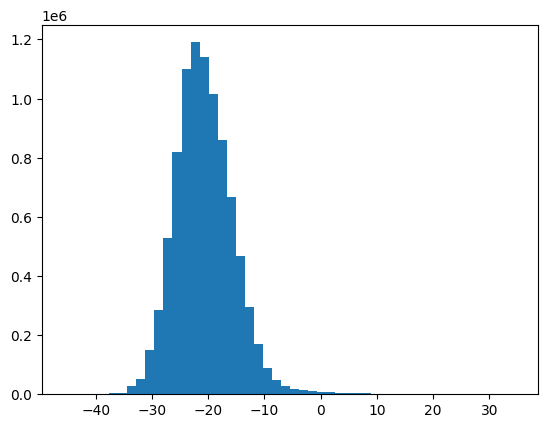

In [ ]:
image_list = images.values.tolist()
flat_list = [item for sublist in image_list for item in sublist]
plt.hist(flat_list, bins=50)

Vi ser også på den fordelingen loggaritmisk. Det er ingen verdier som direkte skiller seg ut.

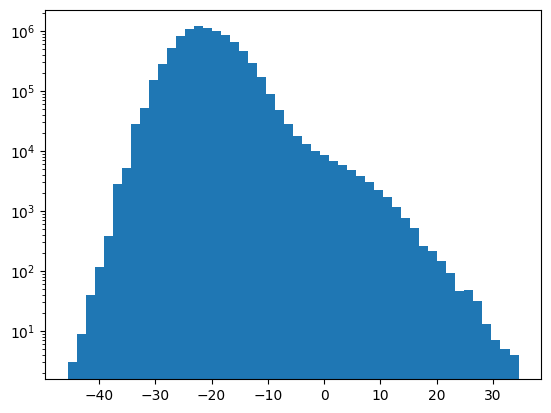

In [ ]:
import pylab as pl

pl.hist(flat_list, bins=50)
pl.gca().set_yscale("log")
pl.show()

Vi finner den høyeste og minste slik at vi kan bruke disse videre

In [ ]:
highest = max(flat_list)
lowest = min(flat_list)

In [ ]:
print(highest, lowest)

34.574917 -45.594448


Tidligere ble denne notebooken brukt til å generere bilder. For å hente ut bildene, brukes nå en datablock istede.